<h1><center>DS 300: Take-home Quiz 5 - CNN</center></h1>

## Introduction:

#### In this assignment, we will practice building CNN models with the Cifar10 dataset [link](https://www.cs.toronto.edu/~kriz/cifar.html).

The CIFAR-10 dataset consists of 60000 32x32 color images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images. 

Available labels: airplane, automobile, bird, cat, deer, dog, frog, horse, ship, and truck. 

Here are 10 random images from each labeled category:
![Image](https://miro.medium.com/max/824/1*SZnidBt7CQ4Xqcag6rd8Ew.png)						


## Question 1: Prerequisite

#### Import all the basic libraries

In [3]:
# Importing the libraries

import pandas as pd
import numpy as np
import sqlalchemy as db
import matplotlib.pyplot as plt
import seaborn as sns

#### Define some constants we are going to use

In [4]:
# Number of classes in the label is 10
num_classes = 10

# Batch size for CNN training is 50
batch_size = 50

# Number of epoches for CNN training is 20
epochs = 20

## Question 2:

#### Load `cifar10` dataset from `keras.datasets` by using the `load_data()` method. Use names as `x_train`, `y_train`, `x_test`, and `y_test`. This step may take various amount of time depending on your Internet speed. 

In [5]:
# load dataset
from keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()



170498071/170498071 [==============================] - 4s 0us/step


#### Print the following information.

In [6]:
print("x_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("Number of train samples:", X_train.shape[0])
print("Number of test samples:", X_test.shape[0])

x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
Number of train samples: 50000
Number of test samples: 10000


## Question 3: 
#### We need to divide the image data by 255 in order to normalize it into the 0-1 range, after converting it into floating point data types. 

In [7]:
# prepare x dataset
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255



#### Find how many images we have for each label in `y_train`. Hint: you may want to use a loop or create a DataFrame.

In [8]:
for i in range(10):
  print(i, y_train[y_train==i].shape[0])

0 5000
1 5000
2 5000
3 5000
4 5000
5 5000
6 5000
7 5000
8 5000
9 5000


## Question 4:

#### Create a dictionary to assign a name to each label. The labels are ordered as follows: airplane, automobile, bird, cat, deer, dog, frog, horse, ship, and truck. For example, 'airplane' has the key of 0.

In [9]:
# give a name to each label
label = {0:'airplane',
         1:'automobile',
         2:'bird', 
         3:'cat',
         4:'deer',
         5:'dog', 
         6:'frog', 
         7:'horse', 
         8:'ship', 
         9:'truck'
         }




#### Convert training and testing target labels to One-Hot encoding scheme. 
Hint: You may want to use the functions from Keras. 

In [10]:
# Convert class vectors to binary class matrices.
from tensorflow.keras.utils import to_categorical



In [11]:
y_train = to_categorical(y_train, num_classes=10)

y_test = to_categorical(y_test, num_classes=10)

#### Print the following information

In [12]:
print("y train shape:", y_train.shape)
print("y test shape:", y_test.shape)
print("First 10 y labels in training set:\n", y_train[:10])


y train shape: (50000, 10)
y test shape: (10000, 10)
First 10 y labels in training set:
 [[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


## Question 5:

#### Visualize the first 10 images with descriptive titles as shown.

In [13]:
np.where(y_train[0]==1)[0][0]

6

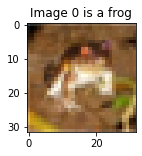

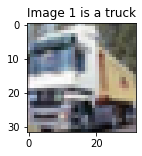

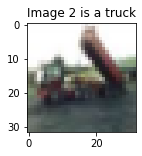

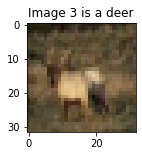

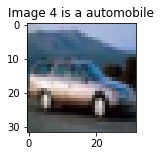

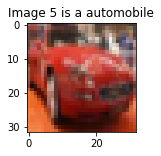

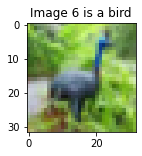

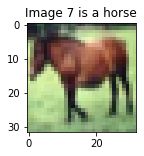

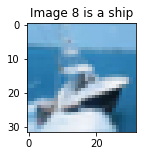

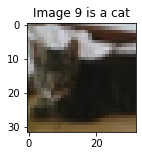

In [14]:
for i in range(10):
    plt.figure(figsize=(2, 2))
    # Display Image
    plt.imshow(X_train[i])
    # Display Title
    plt.title('Image %d is a %s' % (i, label[np.where(y_train[i]==1)[0][0]]))
    
    plt.show()

## Question 6:

#### Now create a sequential CNN model that generates the following model information.

+ We'll start with a 2D convolution of the image - it's set up to take 32 "feature detectors" or "filters", of each image, each feature detector being 3x3 in size. Use rectifier function as the activation function.

+ Next we apply a MaxPooling2D layer that takes the maximum of each 2x2 result to distill the results down into something more manageable.

+ We then run a second convolution on top of that with 32 3x3 windows. Use again the rectifier function.

+ Again, we apply a MaxPooling2D layer that takes the maximum of each 2x2 result.

+ A dropout filter is then applied to prevent overfitting. Use drop out rate as 25%.

+ Next we flatten the 2D layer we have at this stage into a 1D layer. So at this point we can just pretend we have a traditional multi-layer perceptron and feed that into a fully connected layer of 512 units.

+ We then apply dropout again to further prevent overfitting. This time use drop out rate 50%. 

+ And finally, we feed that into our final 10 units where softmax is applied to choose our category of 0-9.

In [15]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

#### Create the layers for the model.

In [16]:
model = keras.Sequential(name = 'Quiz5-CNN')
model.add(layers.Conv2D(32, 
                        kernel_size = (3,3), 
                        activation = 'relu',
                        input_shape= (32, 32, 3)))

model.add(layers.MaxPooling2D(pool_size = (2,2)))

model.add(layers.Conv2D(32, 
                        kernel_size = (3,3), 
                        activation = 'relu'))

model.add(layers.MaxPooling2D(pool_size = (2,2)))

model.add(layers.Dropout(0.25))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation= 'relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(units=10, activation='softmax'))


model.summary()

Model: "Quiz5-CNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 32)         0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 6, 6, 32)          0         
                                                                 
 flatten (Flatten)           (None, 1152)              0 

## Question 7:

#### Compile the model with the given optimizer.

In [17]:
# initiate Adam optimizer
from tensorflow.keras.optimizers import Adam
opt = Adam(lr=0.0001, decay=1e-6)

# Let's train the model using Adam
model.compile(optimizer=opt, 
              loss= 'categorical_crossentropy',
              metrics = ['accuracy'])





/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


#### Train the model with training and validation data. 

In [18]:
history = model.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_data=(X_test, y_test))

Epoch 1/20
1000/1000 [==============================] - 13s 5ms/step - loss: 1.8921 - accuracy: 0.3146 - val_loss: 1.5720 - val_accuracy: 0.4453
Epoch 2/20
1000/1000 [==============================] - 5s 5ms/step - loss: 1.5429 - accuracy: 0.4427 - val_loss: 1.4100 - val_accuracy: 0.5021
Epoch 3/20
1000/1000 [==============================] - 5s 5ms/step - loss: 1.4373 - accuracy: 0.4814 - val_loss: 1.3292 - val_accuracy: 0.5343
Epoch 4/20
1000/1000 [==============================] - 4s 4ms/step - loss: 1.3774 - accuracy: 0.5062 - val_loss: 1.2887 - val_accuracy: 0.5474
Epoch 5/20
1000/1000 [==============================] - 4s 4ms/step - loss: 1.3324 - accuracy: 0.5235 - val_loss: 1.2423 - val_accuracy: 0.5653
Epoch 6/20
1000/1000 [==============================] - 9s 9ms/step - loss: 1.2931 - accuracy: 0.5380 - val_loss: 1.2338 - val_accuracy: 0.5647
Epoch 7/20
1000/1000 [==============================] - 6s 6ms/step - loss: 1.2587 - accuracy: 0.5539 - val_loss: 1.1918 - val_accuracy

## Question 8:

#### Evaluate model with loss and accuracy.

In [19]:
# Score trained model.
score = model.evaluate(X_test, y_test)


print('Test loss:',score[0] )
print('Test accuracy:',score[1])



313/313 [==============================] - 1s 3ms/step - loss: 0.9569 - accuracy: 0.6723
Test loss: 0.956928014755249
Test accuracy: 0.6722999811172485


#### Plot the model accuracy graph over epochs.

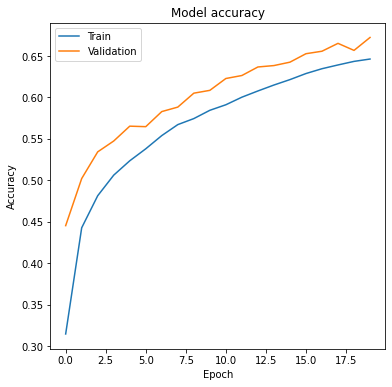

In [20]:
plt.figure(figsize=(6, 6))
plt.title('Model accuracy')
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

## Question 9:

#### Generate predicted results on test data

In [21]:
y_pred = model.predict(X_test)



313/313 [==============================] - 1s 2ms/step


In [22]:
y_pred[0]

array([0.0137447 , 0.00387098, 0.06401999, 0.6416709 , 0.0150442 ,
       0.13555747, 0.11101344, 0.00203054, 0.01106693, 0.00198085],
      dtype=float32)

#### Plot the image, predicted label and the true label.

In [23]:
np.argmax(y_pred[0])

3

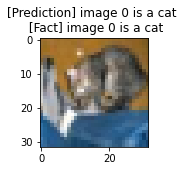

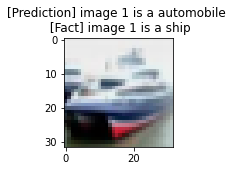

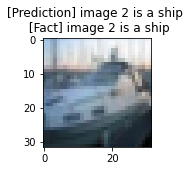

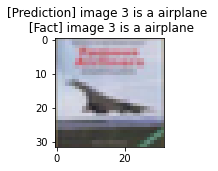

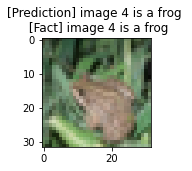

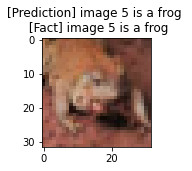

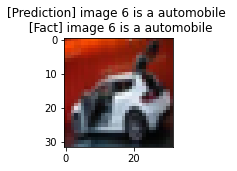

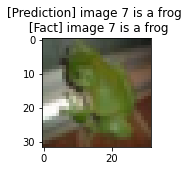

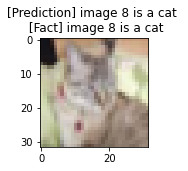

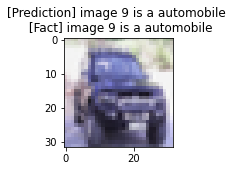

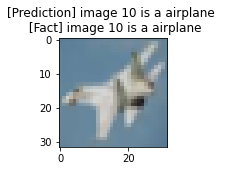

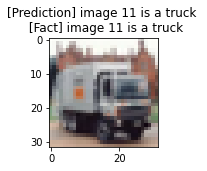

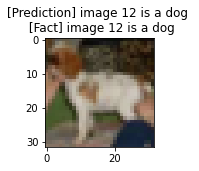

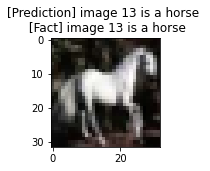

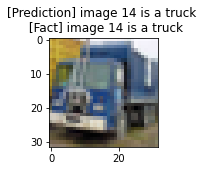

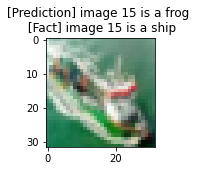

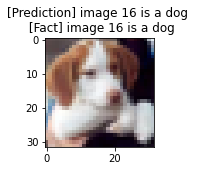

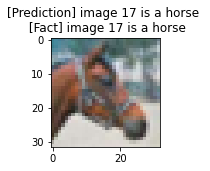

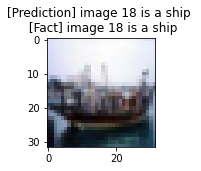

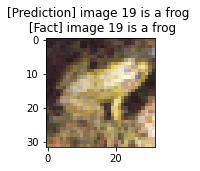

In [24]:
# show image, prediction and actual label
for i in range(20):
    plt.figure(figsize=(2, 2))
    # Plot Image
    plt.imshow(X_test[i])
    # Display Title
    plt.title('[Prediction] image %d is a %s \n [Fact] image %d is a %s' % (i, label[np.argmax(y_pred[i])], i, label[np.where(y_test[i]==1)[0][0]]))
    
    
    
    
    plt.show()

## Question 10:

#### In the CNN model we built, we used an architecture like: conv1 (32, 3x3) --> maxpooling --> conv2 (32, 3x3) --> maxpooling ...
#### Try to boost the validation accuracy of the model by changing the architecture to `VGG` architecture in the following way: conv1 (32, 3x3)  --> conv2 (32, 3x3) --> maxpooling1 --> dropout1 (25%) --> conv3 (64, 3x3)  --> conv4 (64, 3x3) --> maxpooling2 --> dropout2 (25%)  --> flatten1 --> dense (512) --> dropout3 (50%).
#### Without changing the number of epochs, let's see how much we can get improved.


In [25]:
model2 = keras.Sequential(name = 'Quiz5-CNN2')
model2.add(layers.Conv2D(32, 
                        kernel_size = (3,3), 
                        activation = 'relu',
                        input_shape= (32, 32, 3)))

model2.add(layers.Conv2D(32, 
                        kernel_size = (3,3), 
                        activation = 'relu'))

model2.add(layers.MaxPooling2D(pool_size = (2,2)))

model2.add(layers.Dropout(0.25))
model2.add(layers.Conv2D(64, 
                        kernel_size = (3,3), 
                        activation = 'relu'))

model2.add(layers.Conv2D(64, 
                        kernel_size = (3,3), 
                        activation = 'relu'))

model2.add(layers.MaxPooling2D(pool_size = (2,2)))
model2.add(layers.Dropout(0.25))
model2.add(layers.Flatten())

model2.add(layers.Dense(512, activation= 'relu'))
model2.add(layers.Dropout(0.5))
model2.add(layers.Dense(10, activation= 'softmax'))
model2.summary()

Model: "Quiz5-CNN2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 conv2d_3 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 14, 14, 32)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 conv2d_5 (Conv2D)           (None, 10, 10, 64)        36928     
                                                        

In [26]:
model2.compile(optimizer=opt, 
              loss= 'categorical_crossentropy',
              metrics = ['accuracy'])

history2 = model2.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_data=(X_test, y_test))



Epoch 1/20
1000/1000 [==============================] - 7s 6ms/step - loss: 1.7225 - accuracy: 0.3645 - val_loss: 1.4694 - val_accuracy: 0.4694
Epoch 2/20
1000/1000 [==============================] - 5s 5ms/step - loss: 1.4527 - accuracy: 0.4709 - val_loss: 1.3265 - val_accuracy: 0.5161
Epoch 3/20
1000/1000 [==============================] - 6s 6ms/step - loss: 1.3551 - accuracy: 0.5123 - val_loss: 1.2520 - val_accuracy: 0.5536
Epoch 4/20
1000/1000 [==============================] - 5s 5ms/step - loss: 1.2898 - accuracy: 0.5362 - val_loss: 1.1913 - val_accuracy: 0.5740
Epoch 5/20
1000/1000 [==============================] - 6s 6ms/step - loss: 1.2331 - accuracy: 0.5602 - val_loss: 1.1574 - val_accuracy: 0.5943
Epoch 6/20
1000/1000 [==============================] - 5s 5ms/step - loss: 1.1888 - accuracy: 0.5782 - val_loss: 1.0945 - val_accuracy: 0.6175
Epoch 7/20
1000/1000 [==============================] - 6s 6ms/step - loss: 1.1454 - accuracy: 0.5951 - val_loss: 1.0674 - val_accuracy:

313/313 [==============================] - 1s 3ms/step - loss: 0.8156 - accuracy: 0.7179
Test loss: 0.81559157371521
Test accuracy: 0.7178999781608582


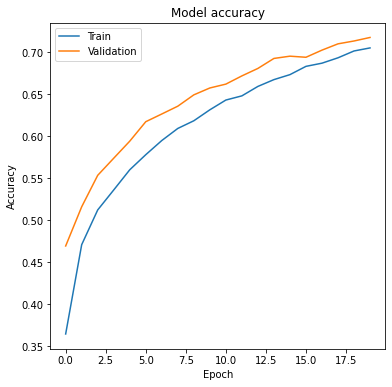

In [27]:
score2 = model2.evaluate(X_test, y_test)
print('Test loss:',score2[0] )
print('Test accuracy:',score2[1])


plt.figure(figsize=(6, 6))
plt.title('Model accuracy')
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])

plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

#### Note: the model is still under-fitted with 20 epochs. Validation accuracy can get at least another 5% increase if number of epochs is greater. 

## Additional Performance Boost

As a bonus question, try to apply "image augmentation" technique as a data preprocessing step to prevent the model from overfitting. 

[Referecen 1: Tensorflow ImageDataGenerator](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator)

[Reference 2: A tech blog1](https://machinelearningmastery.com/how-to-configure-image-data-augmentation-when-training-deep-learning-neural-networks/)

[Reference 3: A tech blog2](https://machinelearningmastery.com/image-augmentation-deep-learning-keras/)

In [28]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


Epoch 1/20
1250/1250 [==============================] - 26s 21ms/step - loss: 1.2113 - accuracy: 0.5709 - val_loss: 2.5546 - val_accuracy: 0.3051
Epoch 2/20
1250/1250 [==============================] - 26s 21ms/step - loss: 1.1861 - accuracy: 0.5764 - val_loss: 2.6869 - val_accuracy: 0.2809
Epoch 3/20
1250/1250 [==============================] - 26s 21ms/step - loss: 1.1578 - accuracy: 0.5918 - val_loss: 2.5169 - val_accuracy: 0.3043
Epoch 4/20
1250/1250 [==============================] - 25s 20ms/step - loss: 1.1410 - accuracy: 0.5972 - val_loss: 2.6158 - val_accuracy: 0.2950
Epoch 5/20
1250/1250 [==============================] - 26s 21ms/step - loss: 1.1304 - accuracy: 0.5984 - val_loss: 2.7061 - val_accuracy: 0.2846
Epoch 6/20
1250/1250 [==============================] - 25s 20ms/step - loss: 1.1159 - accuracy: 0.6050 - val_loss: 2.5118 - val_accuracy: 0.3046
Epoch 7/20
1250/1250 [==============================] - 25s 20ms/step - loss: 1.1048 - accuracy: 0.6084 - val_loss: 2.4535 -

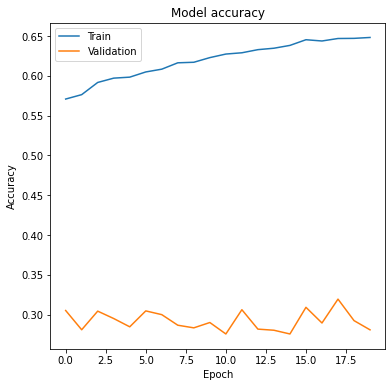

In [31]:
datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    validation_split=0.2)

datagen.fit(X_train)


history2 = model2.fit(datagen.flow(X_train, y_train, batch_size=32, subset='training'),
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_data=(X_test, y_test))

score2 = model2.evaluate(X_test, y_test)
print('Test loss:',score2[0] )
print('Test accuracy:',score2[1])


plt.figure(figsize=(6, 6))
plt.title('Model accuracy')
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])

plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

## Great job!